<a href="https://colab.research.google.com/github/Idascadar/Ida/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
yolo = cv2.dnn.readNet("/content/yolov3-tiny.weights","/content/yolov3-tiny (1).cfg")

In [4]:
classes = []
with open("/content/coco.names",'r') as f:
  classes = f.read().splitlines()

In [6]:
len(classes)

80

In [10]:
img = cv2.imread("/content/birds.jpg")
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0),swapRB=True, crop =False)

In [11]:
blob.shape

(1, 3, 320, 320)

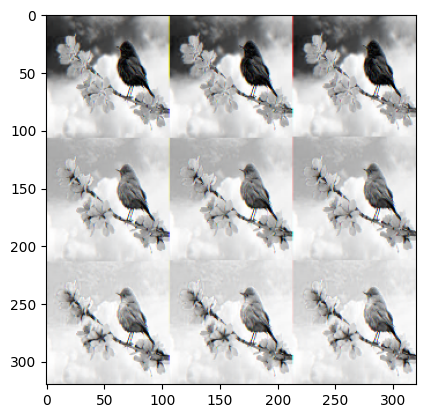

In [13]:
# to print img
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [14]:
yolo.setInput(blob)

In [15]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)

In [27]:
boxes = []
confidences = []  # Changed variable name to avoid conflict
class_ids = []
for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]  # Individual confidence for this detection
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height) # index should be 1 instead of 0
            w = int(detection[2] * width)
            h = int(detection[3] * height) # index should be 3 instead of 0
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))  # Appending to the list
            class_ids.append(class_id)

In [29]:
len(boxes)

0

In [30]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [31]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes)))

In [33]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Check if indexes is not empty and then proceed
if indexes is not None and len(indexes) > 0:  # Check if indexes is not empty
  for i in indexes.flatten():  # Now it's safe to flatten
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence  = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
    cv2.putText(img,label+" "+confidence,(x,y+20),font,2,(255,255,255),2)


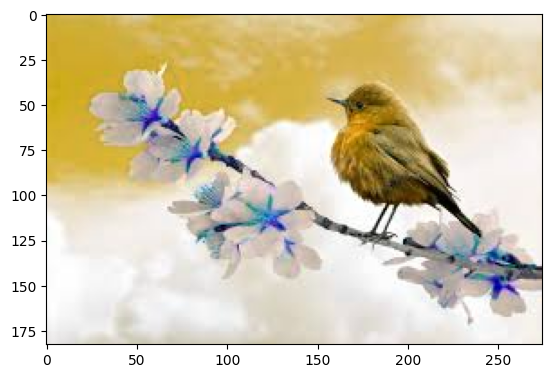

In [34]:
plt.imshow(img)

In [35]:
cv2.imwrite("img.jpg",img)

True